# Dataframe creation

In [1]:
# Importing required packages
import requests                 # for url requests
from bs4 import BeautifulSoup   # for searching inside html structure
import re                       # for using regular expressions
import pandas as pd             # for dataframes

In [2]:
# Initializing session
s = requests.Session()
s.headers.update({'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36'})

In [3]:
# Getting text form the IMDB Top-250 page
start_page = 'https://www.imdb.com/chart/top'
start_page_text = s.get(start_page).text

In [4]:
# Creating a top movies list and parsing the page
link_list = []

template = 'https://www.imdb.com%s'

soup = BeautifulSoup(start_page_text)

for col in soup.find_all('td', {'class':'titleColumn'}):
    link_list.append(template % re.findall("/title/tt[0-9]+", col.find('a').get('href'))[0])

In [5]:
# Creating a dataframe for movie list
movies = pd.DataFrame(link_list, index=range(1, 251), columns=['IMDB link'])

In [6]:
# Expanding our dataframe by adding empty columns
movies.insert(column='Title', loc=0, value=["" for i in range(1,251)])
movies.insert(column='Year', loc=1, value=["" for i in range(1,251)])
movies.insert(column='Genre', loc=2, value=["" for i in range(1,251)])
movies.insert(column='Duration', loc=3, value=["" for i in range(1,251)])
movies.insert(column='Origin', loc=4, value=["" for i in range(1,251)])
movies.insert(column='Director', loc=5, value=["" for i in range(1,251)])
movies.insert(column='IMDB rating', loc=6, value=["" for i in range(1,251)])
movies.insert(column='Rating count', loc=7, value=["" for i in range(1,251)])

In [7]:
# Parsing detailed data from movie pages
for n in range(1, 251):
    page_text = s.get(link_list[n - 1]).text
    soup = BeautifulSoup(page_text)
    
    # Searching for attributes with one valid value
    
    ## It's important to use try/except because English version of the page won't contain the div with class 'originalTitle'
    try:
        movies.at[n, 'Title'] = soup.find('div', {'class':'originalTitle'}).contents[0].strip()
    except AttributeError:
        movies.at[n, 'Title'] = (soup.find('div', {'class':'title_wrapper'}).contents[1]).find(text = re.compile('[a-zA-Z0-9]*'))
    
    movies.at[n, 'Year'] = (soup.find('span', {'id':'titleYear'}).contents[1].get_text().strip())
    movies.at[n, 'Duration'] = soup.find('time', {'datetime':re.compile('[a-zA-Z0-9]*')}).get_text().strip()
    movies.at[n, 'Director'] = soup.find('a', {'href':re.compile('.*/name/nm[0-9]+/\?ref_=tt_ov_dr.*')}).get_text().strip()
    movies.at[n, 'IMDB rating'] = soup.find('span', {'itemprop':'ratingValue'}).get_text().strip()
    movies.at[n, 'Rating count'] = int(soup.find('span', {'itemprop':'ratingCount'}).get_text().strip().replace(',', ''))
    
    # Searching for attributes with multiple (possible) valid values
    genres = soup.find_all('a', {'href':re.compile('.*/search/title\?genres=[a-z]*\&explore=title_type,genres\&ref_=tt_ov_inf.*')})
    movies.at[n, 'Genre'] = ' | '.join(set([x.get_text().strip() for x in genres]))
    
    countries = soup.find_all('a', {'href':re.compile('/search/title\?country_of_origin=[a-z]*&ref_=tt_dt_dt')})
    movies.at[n, 'Origin'] = ' | '.join(set([x.get_text().strip() for x in countries]))

In [8]:
movies

,Title,Year,Genre,Duration,Origin,Director,IMDB rating,Rating count,IMDB link
1,The Shawshank Redemption,1994,Drama,2h 22min,USA,Frank Darabont,9.3,2030817,https://www.imdb.com/title/tt0111161
2,The Godfather,1972,Drama | Crime,2h 55min,USA,Francis Ford Coppola,9.2,1392322,https://www.imdb.com/title/tt0068646
3,The Godfather: Part II,1974,Drama | Crime,3h 22min,USA,Francis Ford Coppola,9.0,964841,https://www.imdb.com/title/tt0071562
4,The Dark Knight,2008,Drama | Action | Thriller | Crime,2h 32min,USA | UK,Christopher Nolan,9.0,1998623,https://www.imdb.com/title/tt0468569
5,12 Angry Men,1957,Drama,1h 36min,USA,Sidney Lumet,8.9,571145,https://www.imdb.com/title/tt0050083
6,Schindler's List,1993,Drama | Biography | History,3h 15min,USA,Steven Spielberg,8.9,1050056,https://www.imdb.com/title/tt0108052
7,The Lord of the Rings: The Return of the King,2003,Drama | Adventure | Fantasy | Action,3h 21min,USA | New Zealand,Peter Jackson,8.9,1445888,https://www.imdb.com/title/tt0167260
8,Pulp Fiction,1994,Drama | Crime,2h 34min,USA,Quentin Tarantino,8.9,1585797,https://www.imdb.com/title/tt0110912
9,"Il buono, il brutto, il cattivo",1966,Western,2h 41min,West Germany | Italy | Spain,Sergio Leone,8.9,602707,https://www.imdb.com/title/tt0060196
10,Fight Club,1999,Drama,2h 19min,USA | Germany,David Fincher,8.8,1625021,https://www.imdb.com/title/tt0137523


In [9]:
# Saving the table to scv file
movies.to_csv('imdb_top_250.csv')

# Dataframe manipulations

In [10]:
# Adding a coloured bars to 'Rating count' column
movies.style.bar(subset=['Rating count'], align='mid', color=['#5fba7d'])

,Title,Year,Genre,Duration,Origin,Director,IMDB rating,Rating count,IMDB link
1,The Shawshank Redemption,1994,Drama,2h 22min,USA,Frank Darabont,9.3,2030817,https://www.imdb.com/title/tt0111161
2,The Godfather,1972,Drama | Crime,2h 55min,USA,Francis Ford Coppola,9.2,1392322,https://www.imdb.com/title/tt0068646
3,The Godfather: Part II,1974,Drama | Crime,3h 22min,USA,Francis Ford Coppola,9.0,964841,https://www.imdb.com/title/tt0071562
4,The Dark Knight,2008,Drama | Action | Thriller | Crime,2h 32min,USA | UK,Christopher Nolan,9.0,1998623,https://www.imdb.com/title/tt0468569
5,12 Angry Men,1957,Drama,1h 36min,USA,Sidney Lumet,8.9,571145,https://www.imdb.com/title/tt0050083
6,Schindler's List,1993,Drama | Biography | History,3h 15min,USA,Steven Spielberg,8.9,1050056,https://www.imdb.com/title/tt0108052
7,The Lord of the Rings: The Return of the King,2003,Drama | Adventure | Fantasy | Action,3h 21min,USA | New Zealand,Peter Jackson,8.9,1445888,https://www.imdb.com/title/tt0167260
8,Pulp Fiction,1994,Drama | Crime,2h 34min,USA,Quentin Tarantino,8.9,1585797,https://www.imdb.com/title/tt0110912
9,"Il buono, il brutto, il cattivo",1966,Western,2h 41min,West Germany | Italy | Spain,Sergio Leone,8.9,602707,https://www.imdb.com/title/tt0060196
10,Fight Club,1999,Drama,2h 19min,USA | Germany,David Fincher,8.8,1625021,https://www.imdb.com/title/tt0137523


In [11]:
# Displaying table with left text alignment
movies.style.set_properties(**{'text-align': 'left'})

# How many marks left IMDB users for movies, released in different years?

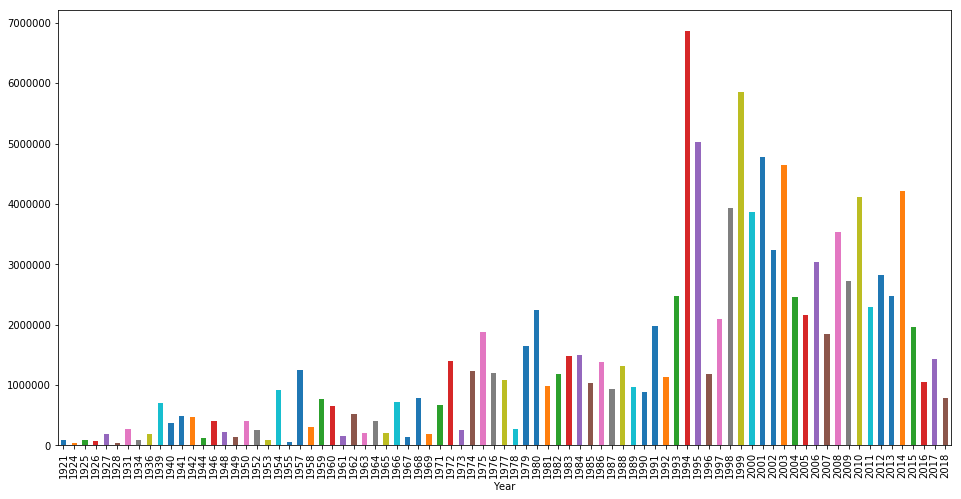

In [12]:
# Grouping the data by years and reindexing the table to display the oldest films at first
movies.groupby('Year').sum().reset_index().plot(
    kind='bar',
    x='Year',
    y='Rating count',
    figsize=[16, 8],
    legend=None
)